<a href="https://colab.research.google.com/github/seokhee516/Project/blob/main/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [28]:
df = pd.read_csv("vgames2.csv")

In [18]:
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [5]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

# 결측치 제거

In [7]:
df.isnull().any().any()

True

In [8]:
df.isnull().any()

Unnamed: 0     False
Name           False
Platform       False
Year            True
Genre           True
Publisher       True
NA_Sales       False
EU_Sales       False
JP_Sales       False
Other_Sales    False
dtype: bool

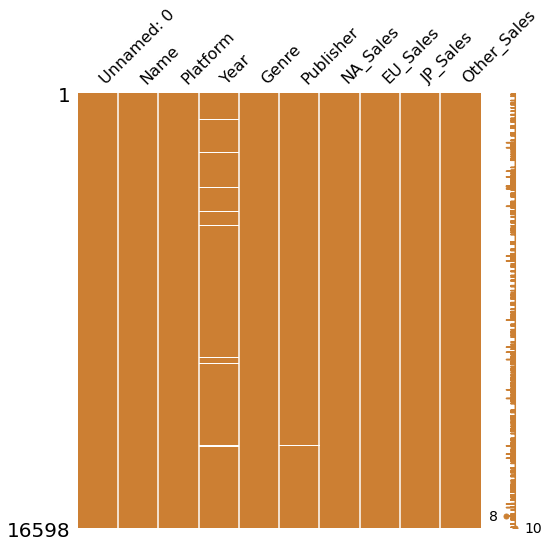

In [11]:
msno.matrix(df=df.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [29]:
df = df.dropna()

In [30]:
df = df.reset_index()
df = df.iloc[:,2:]

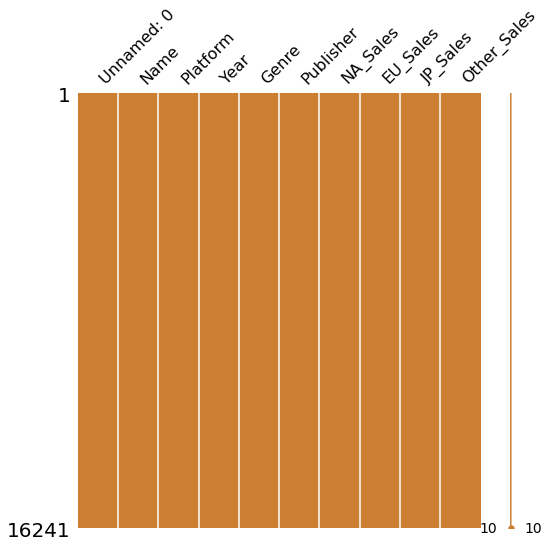

In [38]:
msno.matrix(df=df.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# 전처리

## year

In [34]:
df.loc[(df['Year'].values <60),'Year'] = df.loc[(df['Year'].values <60),'Year'] + 2000

In [35]:
 df.loc[(df['Year'].values >21) & (df['Year'].values < 100),'Year'] =  df.loc[(df['Year'].values >21) & (df['Year'].values < 100),'Year'] + 1900

In [36]:
df['Year'].astype(int).unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

## sales

In [31]:
df.loc[df['NA_Sales'].str.contains('M'),'NA_Sales'] = df.loc[df['NA_Sales'].str.contains('M'),'NA_Sales'].replace('M','', regex=True)
df.loc[df['EU_Sales'].str.contains('M'),'EU_Sales'] = df.loc[df['EU_Sales'].str.contains('M'),'EU_Sales'].replace('M','', regex=True)
df.loc[df['JP_Sales'].str.contains('M'),'JP_Sales'] = df.loc[df['JP_Sales'].str.contains('M'),'JP_Sales'].replace('M','', regex=True)
df.loc[df['Other_Sales'].str.contains('M'),'Other_Sales'] = df.loc[df['Other_Sales'].str.contains('M'),'Other_Sales'].replace('M','', regex=True)

In [32]:
df.loc[df['NA_Sales'].str.contains('K'),'NA_Sales'] = df.loc[df['NA_Sales'].str.contains('K'),'NA_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000
df.loc[df['EU_Sales'].str.contains('K'),'EU_Sales'] = df.loc[df['EU_Sales'].str.contains('K'),'EU_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000
df.loc[df['JP_Sales'].str.contains('K'),'JP_Sales'] = df.loc[df['JP_Sales'].str.contains('K'),'JP_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000
df.loc[df['Other_Sales'].str.contains('K'),'Other_Sales'] = df.loc[df['Other_Sales'].str.contains('K'),'Other_Sales'].replace('K','', regex=True).apply(pd.to_numeric) / 1000

In [33]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric)

# EDA(필수)

In [27]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [29]:
df['Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

## 1. 지역에 따라서 선호하는 게임 장르가 다를까

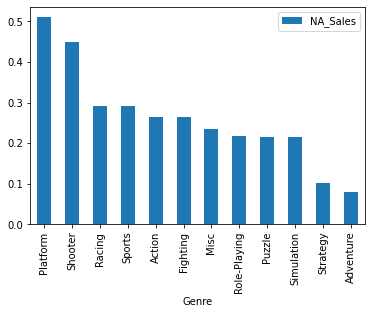

In [118]:
df[['Genre','NA_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='NA_Sales', ascending=False).plot.bar()

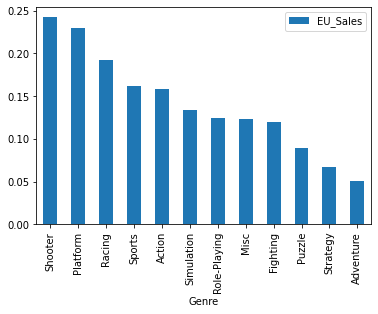

In [119]:
df[['Genre','EU_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='EU_Sales', ascending=False).plot.bar()

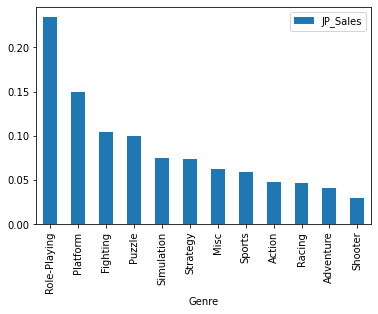

In [120]:
df[['Genre','JP_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='JP_Sales', ascending=False).plot.bar()

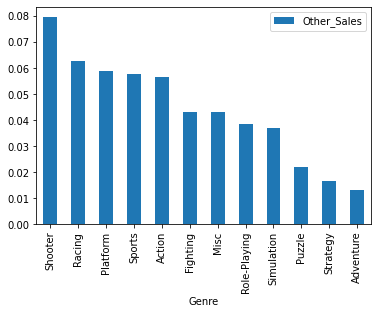

In [121]:
df[['Genre','Other_Sales']].groupby(['Genre'], as_index=True).mean().sort_values(by='Other_Sales', ascending=False).plot.bar()

## 2. 연도별 게임의 트렌드가 있을까

In [127]:
pd.crosstab(df['Genre'], df['Year'])

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,8,20,31,44,39,43,66,125,144,125,192,184,210,219,271,226,239,263,148,186,253,118,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,17,14,23,19,16,20,41,12,38,42,71,84,166,141,153,107,57,60,75,53,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,22,29,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,49,29,20,23,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,45,53,67,110,109,150,210,207,200,183,38,42,41,39,18,0,0
Platform,0,3,5,5,1,4,6,2,4,3,3,6,6,11,11,13,14,18,25,18,24,43,77,87,66,82,54,42,62,28,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,25,32,42,65,64,79,45,43,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,21,36,48,49,43,71,103,109,70,77,75,84,82,83,57,64,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,32,29,41,54,48,60,71,108,103,112,103,103,95,78,70,90,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,29,23,27,23,16,20,36,78,73,88,96,69,84,83,91,81,94,48,59,47,34,32,0,0


Text(0.5, 1.0, '1980-2020')

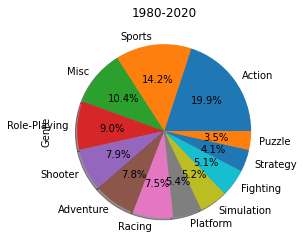

In [146]:
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('1980-2020')

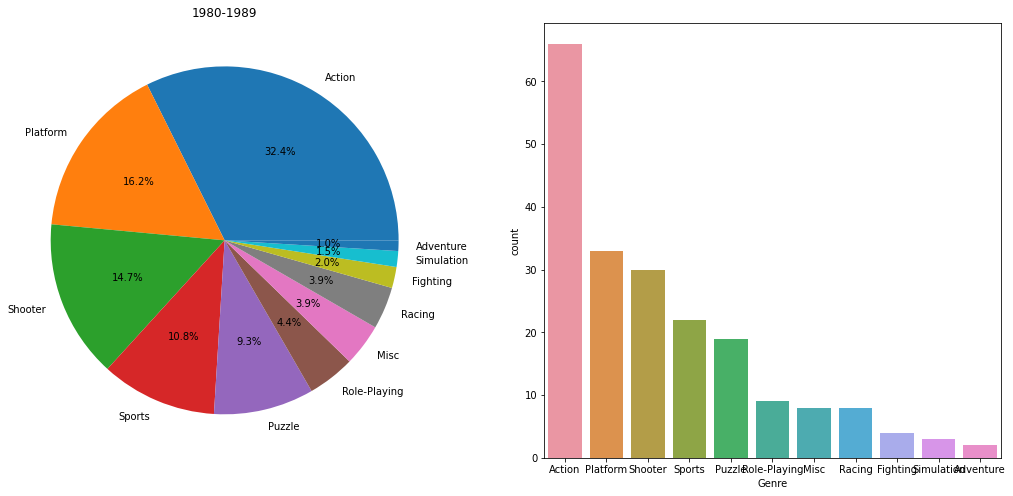

In [179]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df.loc[((df['Year'] >= 1980) & (df['Year'] <=1989)),'Genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('1980-1989')
ax[0].set_ylabel('')

sns.countplot('Genre', data=df.loc[((df['Year'] >= 1980) & (df['Year'] <=1989))], 
              order= df.loc[((df['Year'] >= 1980) & (df['Year'] <=1989)),'Genre'].value_counts().index,
              ax=ax[1])

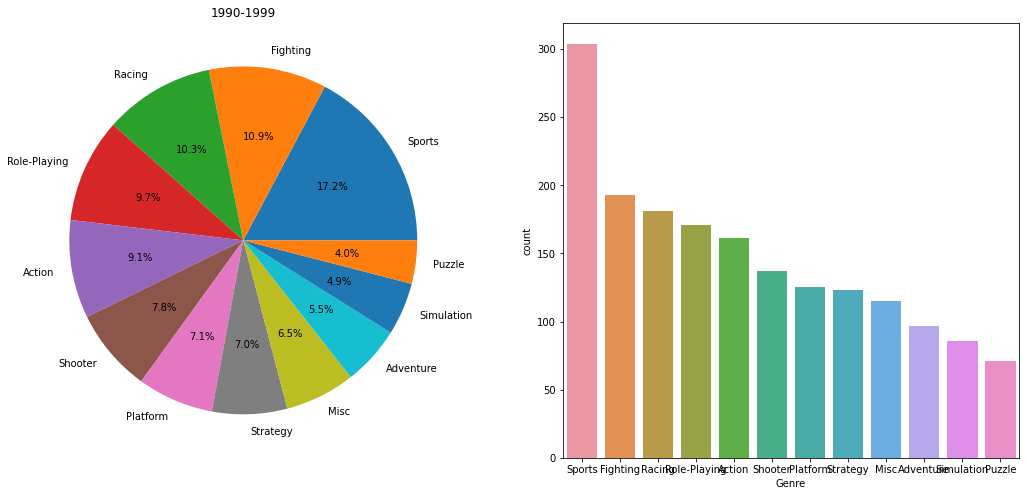

In [182]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df.loc[((df['Year'] >= 1990) & (df['Year'] <=1999)),'Genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('1990-1999')
ax[0].set_ylabel('')

sns.countplot('Genre', data=df.loc[((df['Year'] >= 1990) & (df['Year'] <=1999))], 
              order= df.loc[((df['Year'] >= 1990) & (df['Year'] <=1999)),'Genre'].value_counts().index,
              ax=ax[1])

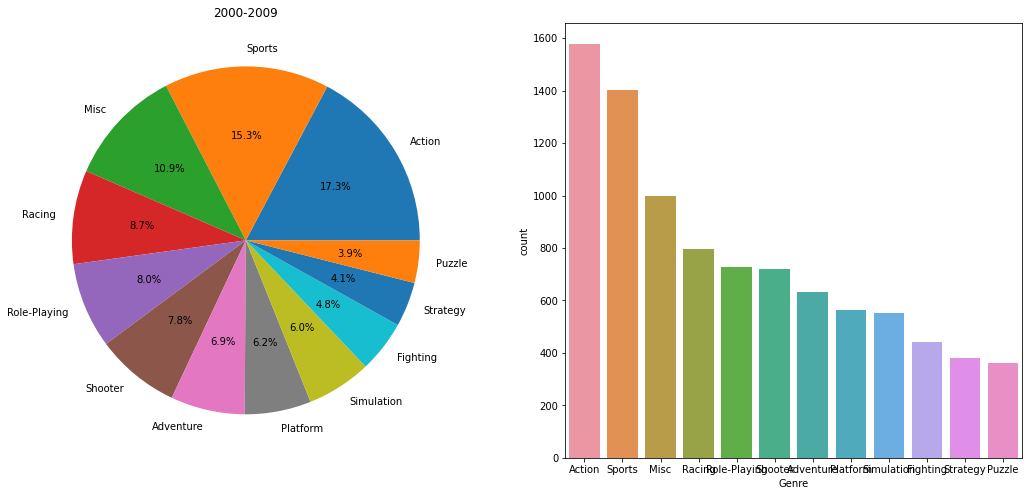

In [183]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df.loc[((df['Year'] >= 2000) & (df['Year'] <=2009)),'Genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('2000-2009')
ax[0].set_ylabel('')

sns.countplot('Genre', data=df.loc[((df['Year'] >= 2000) & (df['Year'] <=2009))], 
              order= df.loc[((df['Year'] >= 2000) & (df['Year'] <=2009)),'Genre'].value_counts().index,
              ax=ax[1])

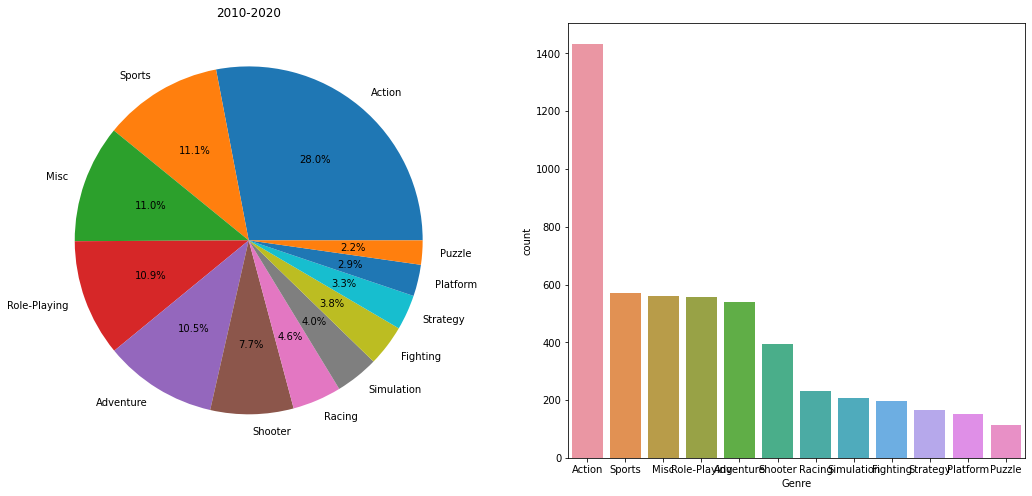

In [184]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df.loc[((df['Year'] >= 2010) & (df['Year'] <=2020)),'Genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('2010-2020')
ax[0].set_ylabel('')

sns.countplot('Genre', data=df.loc[((df['Year'] >= 2010) & (df['Year'] <=2020))], 
              order= df.loc[((df['Year'] >= 2010) & (df['Year'] <=2020)),'Genre'].value_counts().index,
              ax=ax[1])

## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [37]:
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [38]:
df_top_100 = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:100,:]

In [40]:
df_top_100 = df_top_100.reset_index()

In [41]:
df_top_100 = df_top_100.iloc[:,1:]

In [42]:
df_top_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
96,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
97,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
98,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.32


Text(0.5, 1.0, 'Publisher')

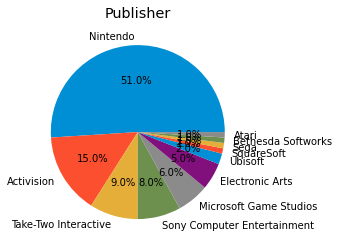

In [219]:
df_top_100['Publisher'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Publisher')

Text(0.5, 1.0, 'Platform')

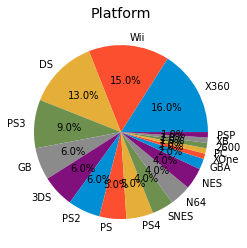

In [220]:
df_top_100['Platform'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Platform')

Text(0.5, 1.0, 'Genre')

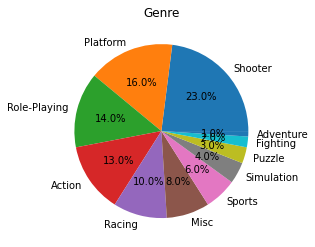

In [215]:
df_top_100['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Genre')

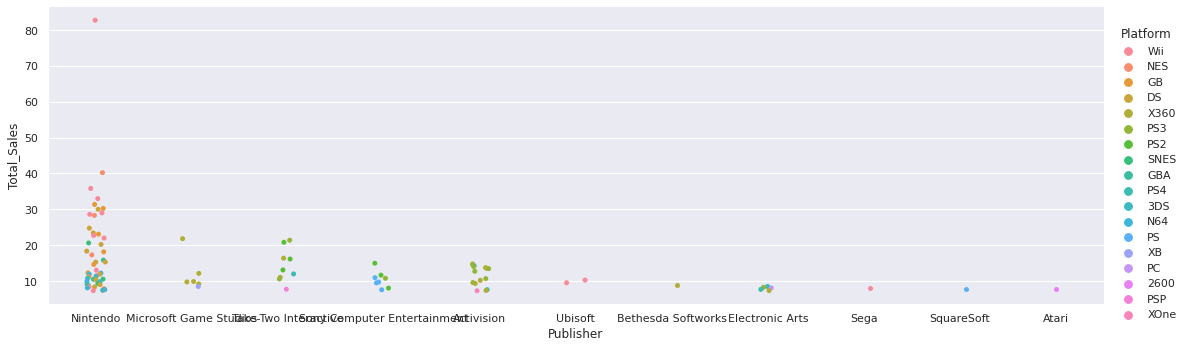

In [84]:
sns.catplot(data = df_top_100,
            x = 'Publisher', 
            y= 'Total_Sales', 
            kind = 'strip', 
            hue = 'Platform', 
            aspect=25/8)

In [48]:
df_top_30 = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:30,:]
df_top_30 = df_top_30.reset_index()
df_top_30 = df_top_30.iloc[:,1:]

In [237]:
df_top_30

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


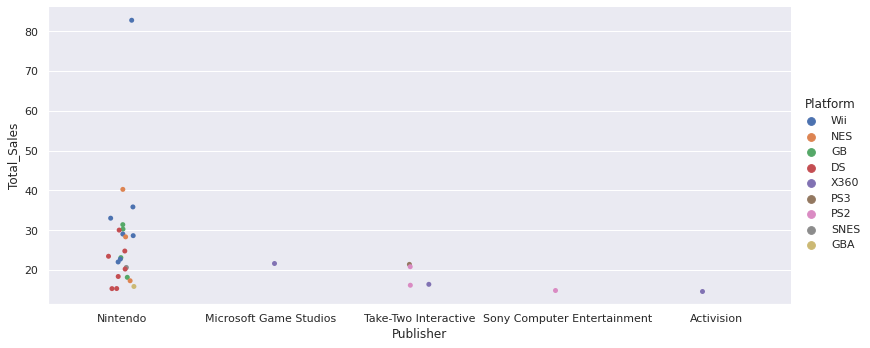

In [61]:
sns.catplot(data = df_top_30,
            x = 'Publisher', 
            y= 'Total_Sales', 
            kind = 'strip', 
            hue = 'Platform', 
            aspect=18/8)

In [224]:
df_top_10 = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:10,:]
df_top_10 = df_top_10.reset_index()
df_top_10 = df_top_10.iloc[:,1:]

In [236]:
df_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


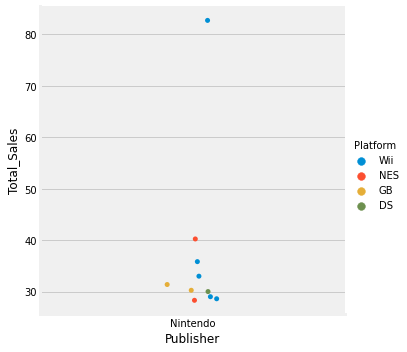

In [226]:
sns.catplot(data = df_top_10, 
            x = 'Publisher', y= 'Total_Sales', kind = 'strip', hue = 'Platform')

# EDA(선택)

## 제조사별 출고량과 출시연도 함께 비교

### 2010~2020

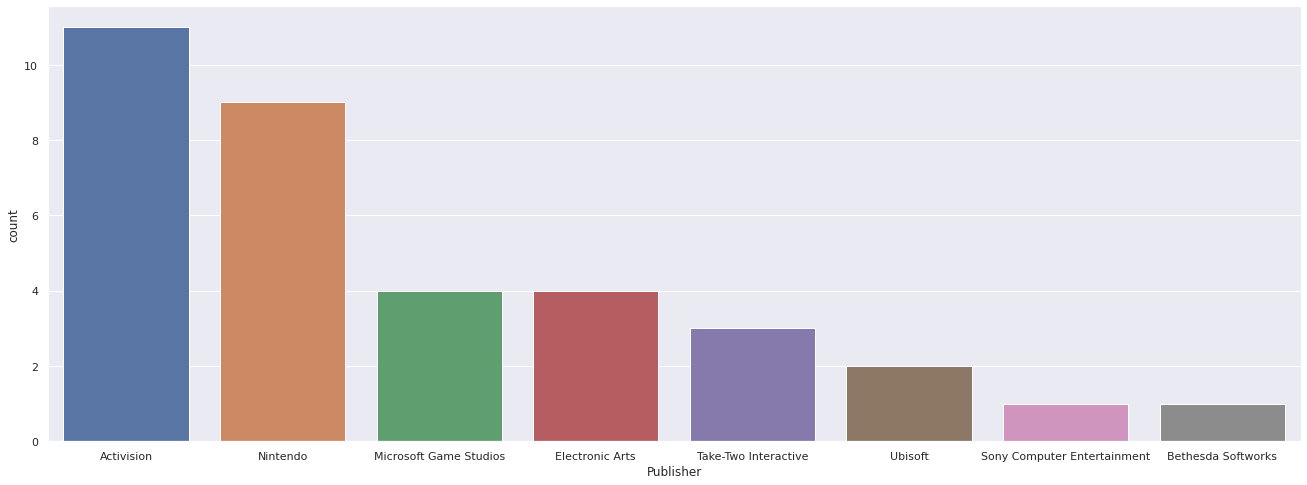

In [62]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot('Publisher', 
              data=df_top_100.loc[((df_top_100['Year'] >= 2010) & (df_top_100['Year'] <=2020))], 
              order= df_top_100.loc[((df_top_100['Year'] >= 2010) & (df_top_100['Year'] <=2020)),'Publisher'].value_counts().index)

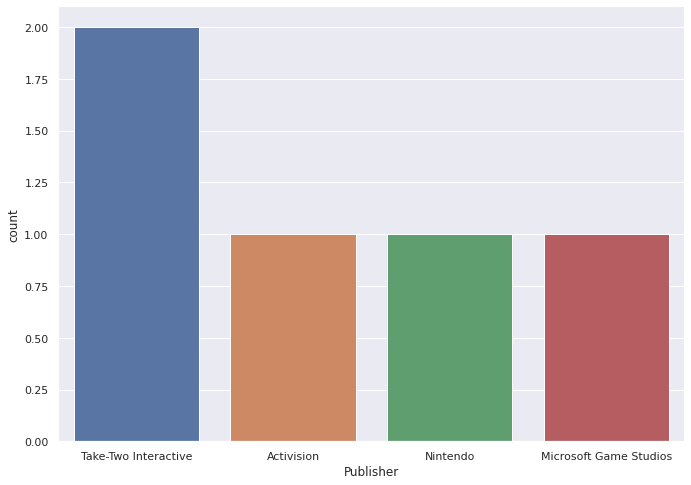

In [58]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot('Publisher', 
              data=df_top_30.loc[((df_top_30['Year'] >= 2010) & (df_top_30['Year'] <=2020))], 
              order= df_top_30.loc[((df_top_30['Year'] >= 2010) & (df_top_30['Year'] <=2020)),'Publisher'].value_counts().index)

In [244]:
df.sort_values(by=['Total_Sales'], ascending=False).iloc[:10,:]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 지역간 상관관계가 존재할까


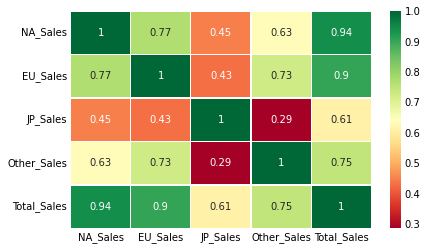

In [46]:
sns.heatmap(df.drop('Year', axis=1).corr(), annot=True, cmap='RdYlGn',linewidths=0.2)

- 북미지역은 유럽지역과 전체지역 출고량과 높은 상관성
- 유럽지역은 북미지역과 기타지역, 전체지역 출고량과 높은 상관성
- 일본지역 출고량은 대체로 상관성을 보이지 않음
- 기타지역은 유럽지역과 전체지역 출고량과의 높은 상관성
- 전체 지역 출고량을 향상시키기위해서는 북미와 유럽 지역을 노려야함

## 판매량이 낮은 제품의 특징은?


In [74]:
df[(df['Total_Sales']<=0.01) & (df['Year']<=2010)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
62,SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.0,0.01
77,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.0,0.01
109,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.0,0.01
125,Rozen Maiden: Gebetgarten,PS2,2007.0,Fighting,Taito,0.00,0.00,0.01,0.0,0.01
133,Super Robot Taisen XO,X360,2006.0,Strategy,Banpresto,0.00,0.00,0.01,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...
16145,The Dark Hills of Cherai,PC,2009.0,Puzzle,Unknown,0.00,0.01,0.00,0.0,0.01
16155,Fatal Fury: Battle Archives Volume 1 (JP sales),PS2,2006.0,Fighting,Ignition Entertainment,0.00,0.00,0.01,0.0,0.01
16167,F.E.A.R. Perseus Mandate,PC,2007.0,Shooter,Vivendi Games,0.01,0.00,0.00,0.0,0.01
16170,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.0,0.01


Text(0.5, 1.0, 'Genre')

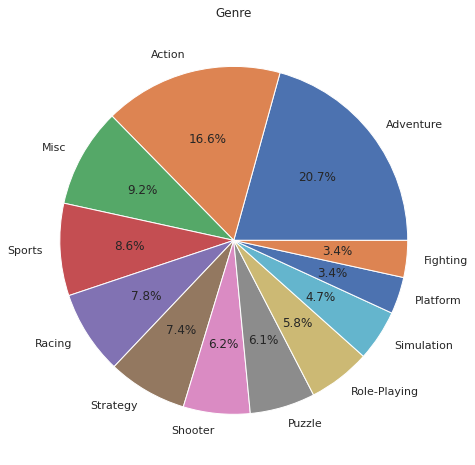

In [69]:
df[df['Total_Sales']<=0.01]['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Genre')

Text(0.5, 1.0, 'Genre')

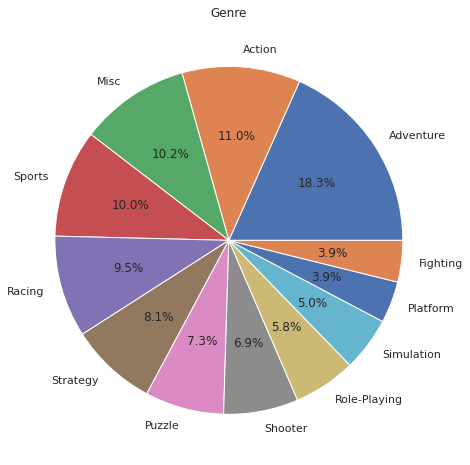

In [75]:
df[(df['Total_Sales']<=0.01) & (df['Year']<=2010)]['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Genre')

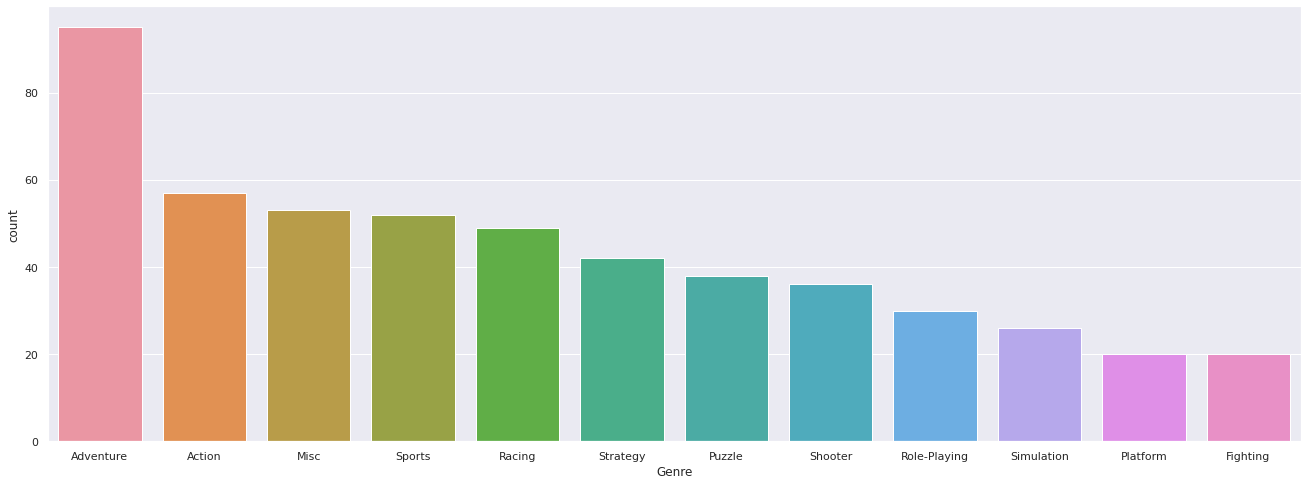

In [82]:
sns.countplot('Genre', data=df.loc[(df['Total_Sales']<=0.01) & (df['Year']<=2010)], 
              order= df.loc[(df['Total_Sales']<=0.01) & (df['Year']<=2010),'Genre'].value_counts().index)

## 연도별 매출이 높은 제조사

In [ ]:
pd.crosstab([df.Year,data.Pclass], [data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [90]:
pd.crosstab(df.Year, [df_top_30.Publisher])

Publisher,Activision,Microsoft Game Studios,Nintendo,Sony Computer Entertainment,Take-Two Interactive
Year,,,,,
1996.0,0,0,1,0,0
1997.0,0,0,1,0,0
2000.0,1,0,0,0,0
2001.0,0,0,1,0,0
2002.0,0,0,2,0,0
2003.0,0,0,1,0,1
2004.0,0,0,0,1,0
2005.0,0,0,4,0,0
2006.0,0,0,1,0,0


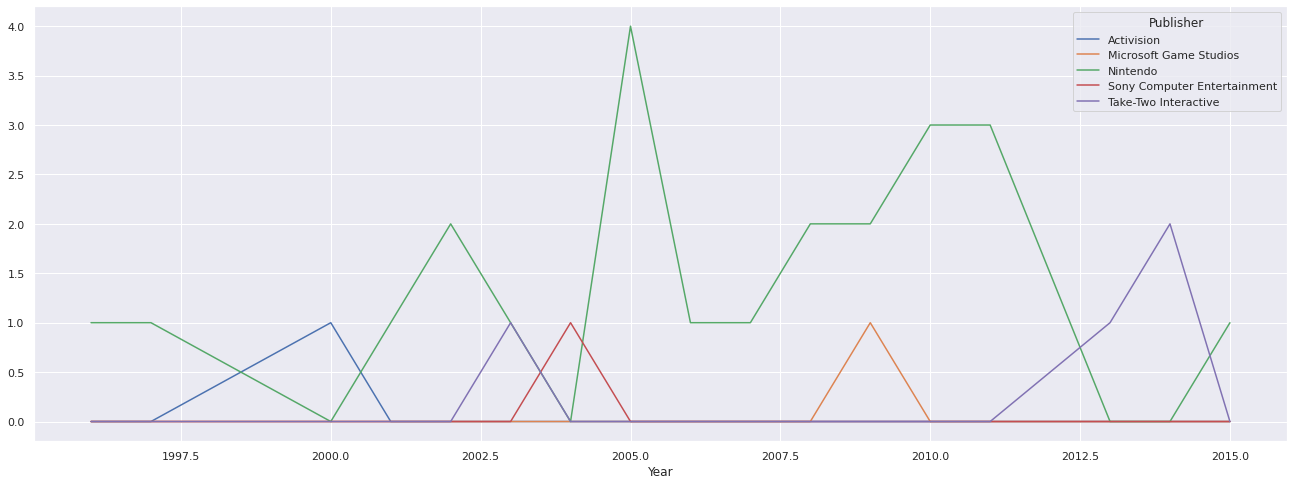

In [92]:
pd.crosstab(df.Year, [df_top_30.Publisher]).plot()

In [100]:
df_top_30.groupby(['Year', 'Publisher']).mean()

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,Publisher,,,,,
1984.0,Nintendo,26.930000,0.630000,0.280000,0.470000,28.3100
1985.0,Nintendo,29.080000,3.580000,6.810000,0.770000,40.2400
1988.0,Nintendo,9.540000,3.440000,3.840000,0.460000,17.2800
1989.0,Nintendo,17.015000,2.485000,4.200000,0.500000,24.2000
1990.0,Nintendo,12.780000,3.750000,3.540000,0.550000,20.6200
1996.0,Nintendo,11.270000,8.890000,10.220000,1.000000,31.3800
1999.0,Nintendo,9.000000,6.180000,7.200000,0.710000,23.0900
2001.0,Sony Computer Entertainment,6.850000,5.090000,1.870000,1.160000,14.9700
2002.0,Nintendo,6.060000,3.900000,5.380000,0.500000,15.8400


## 출시 연도와 출고량을 비교해보자

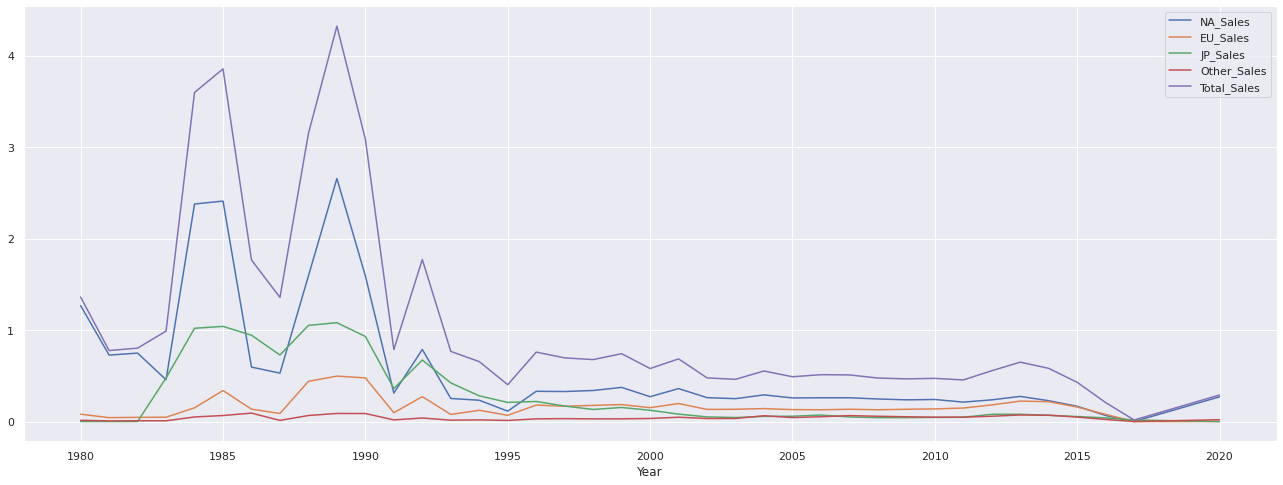

In [136]:
df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].mean().plot()

출시 년도 기준, 1980-1995년 출시 게임들의 누적 판매량이 높다.

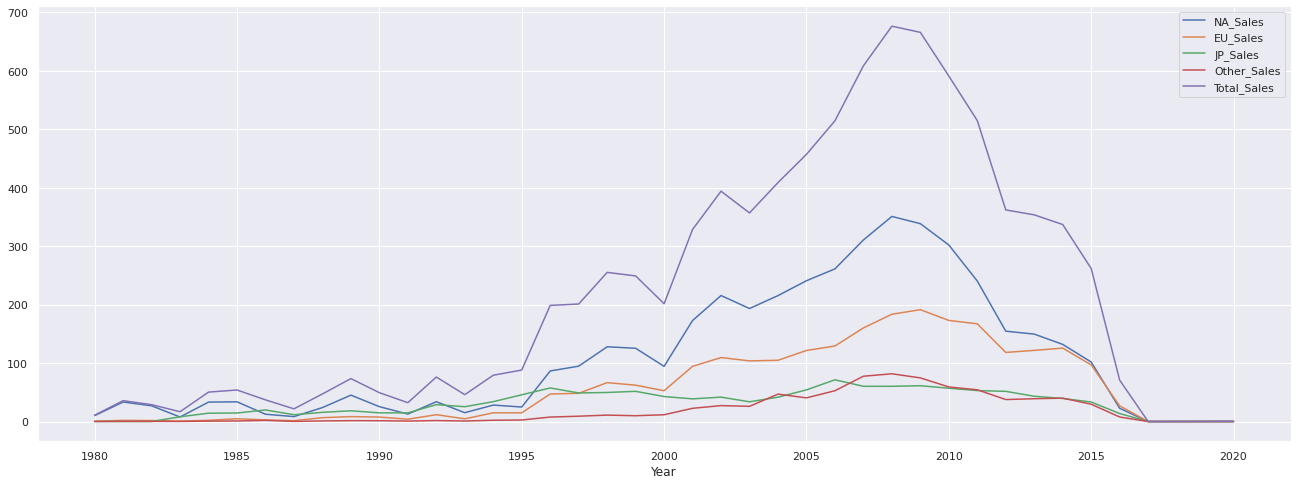

In [105]:
df.groupby(['Year']).sum().plot()

누적 출고량이므로 의미가 없다.

### 연간 출고량을 찾아보자

In [121]:
df['NA_Sales_annual'] = df['NA_Sales'] / (2021 - df['Year'])
df['EU_Sales_annual'] = df['EU_Sales'] / (2021 - df['Year'])
df['JP_Sales_annual'] = df['JP_Sales'] / (2021 - df['Year'])
df['Other_Sales_annual'] = df['Other_Sales'] / (2021 - df['Year'])

In [126]:
df['Total_Sales_annual'] = df[['NA_Sales_annual', 'EU_Sales_annual', 'JP_Sales_annual','Other_Sales_annual']].sum(axis=1)

In [127]:
df.groupby('Year')['NA_Sales_annual', 'EU_Sales_annual', 'JP_Sales_annual','Other_Sales_annual','Total_Sales_annual'].sum()

,NA_Sales_annual,EU_Sales_annual,JP_Sales_annual,Other_Sales_annual,Total_Sales_annual
Year,,,,,
1980.0,0.247073,0.015610,0.000000,0.002683,0.265366
1981.0,0.835000,0.049000,0.000000,0.008000,0.892000
1982.0,0.690256,0.042308,0.000000,0.007949,0.740513
1983.0,0.204211,0.021053,0.213158,0.003684,0.442105
1984.0,0.899459,0.056757,0.385676,0.018919,1.360811
1985.0,0.936944,0.131667,0.404444,0.025556,1.498611
1986.0,0.357143,0.081143,0.566000,0.055143,1.059429
1987.0,0.248824,0.041471,0.342059,0.005882,0.638235
1988.0,0.723333,0.199697,0.477576,0.030000,1.430606


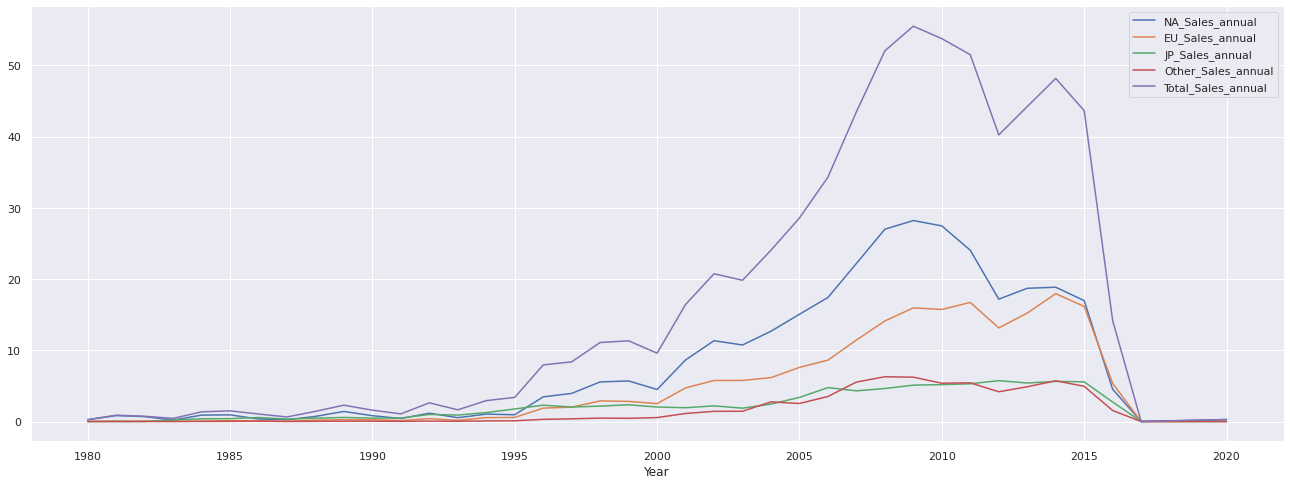

In [128]:
df.groupby('Year')['NA_Sales_annual', 'EU_Sales_annual', 'JP_Sales_annual','Other_Sales_annual','Total_Sales_annual'].sum().plot()

In [131]:
df.groupby('Year')['NA_Sales_annual', 'EU_Sales_annual', 'JP_Sales_annual','Other_Sales_annual','Total_Sales_annual'].mean().tail(5)

,NA_Sales_annual,EU_Sales_annual,JP_Sales_annual,Other_Sales_annual,Total_Sales_annual
Year,,,,,
2014.0,0.032505,0.030943,0.009719,0.009857,0.083025
2015.0,0.027774,0.026440,0.009119,0.008088,0.071421
2016.0,0.013251,0.015649,0.007994,0.004532,0.041427
2017.0,0.000000,0.000000,0.004167,0.000000,0.004167
2020.0,0.270000,0.000000,0.000000,0.020000,0.290000


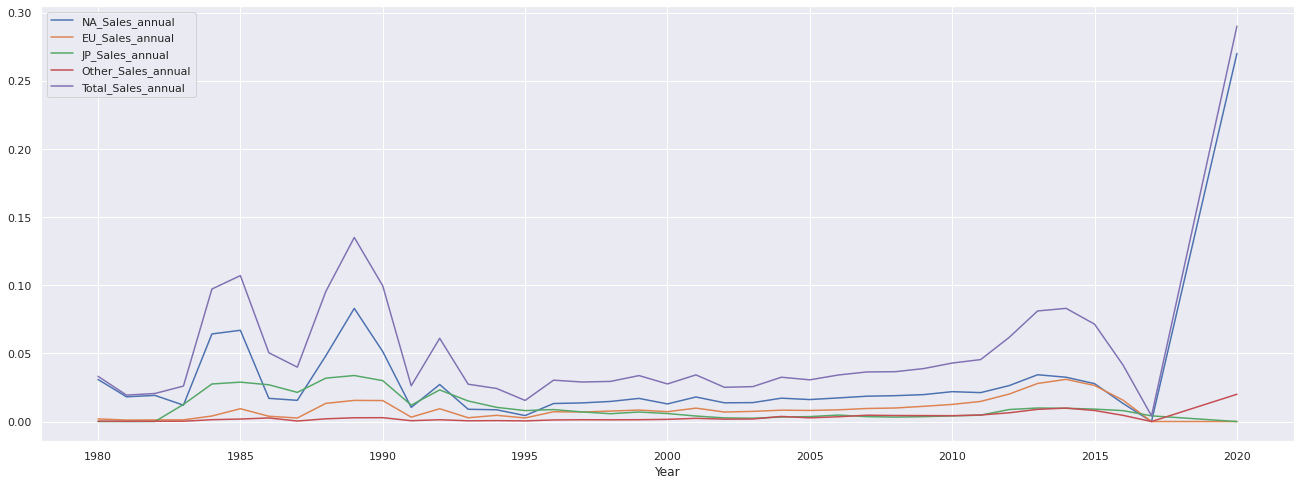

In [129]:
df.groupby('Year')['NA_Sales_annual', 'EU_Sales_annual', 'JP_Sales_annual','Other_Sales_annual','Total_Sales_annual'].mean().plot()